# Seaborn-Distplot,Joinplot,Pairplot-Part1

### Distribution plots - distplot, joinplot and pairplot => seabor is vvvimp for EDA(exploratory data analysis)
### Univariate(f1), Bivariate(f1,f2), when dataset has more than 2 features, seaborn can be used to visualize the ### same.
### (f1,f2,f3=> distplot) and more than 3 > pairplot..
### Problems on IRIS dataset...

In [18]:
import seaborn as sns

In [180]:
df=sns.load_dataset("tips") # https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv
# Seaborn Internally loads the built in "tips" dataset from a remote server.. like tips we have so many other datasets.
# tips is basically a dataset related to a restaurant where workers got tips from customers.
# vvvimp: with proxy server turned on, any url fetching is not allowed, so disable proxy , use wifi and then restart the jupyter
# notebook..

In [181]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Problem Statement: Based on the independant features like total bill, sex, smoker, day, time etc, create a model which can predict the tip(dependant feature)..

## Correlation with heatmap: 
A correlation heatmap uses colored cells , typically in a monochromatic scale, to show a 2D correlation matrix
between two discrete dimensions or event types. vvimp for feature selection. Correlation find out inter-relation between two features for values of int/float not category types.

Correlation is a statistical measure.
Correlation explains how one or more variables are related to each other. These variables can be input data features which have been used to forecast our target variable.
Two features (variables) can be positively correlated with each other. It means that when the value of one variable increases then the value of the other variable(s) also increases.
more info:

https://medium.com/fintechexplained/did-you-know-the-importance-of-finding-correlations-in-data-science-1fa3943debc2

In [9]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


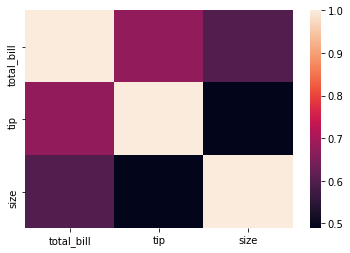

In [10]:
sns.heatmap(df.corr())

In [14]:
df['total_bill'].corr(df['tip'])

0.6757341092113646

In [15]:
df['tip'].corr(df['total_bill'])

0.6757341092113647

In [19]:
import pandas as pd
import numpy as np

In [139]:
df2=pd.DataFrame(np.arange(1,11,1).reshape(5,2), index=['Row1','Row2','Row3','Row4','Row5'],columns=['Col1','Col2'])
df2
#df2=pd.DataFrame(np.array(lst3,lst4).reshape(5,2), index=['Row1','Row2','Row3','Row4','Row5'],columns=['Col1','Col2'],)

,Col1,Col2
Row1,1,2
Row2,3,4
Row3,5,6
Row4,7,8
Row5,9,10


In [140]:
count=0;
for x in df2['Col1']:
    count=count+1
    df2.iloc[(count-1):(count),1:]=x*(-3) # x*3
    
df2

,Col1,Col2
Row1,1,-3
Row2,3,-9
Row3,5,-15
Row4,7,-21
Row5,9,-27


In [149]:
df2['Col1'].corr(df2['Col2'],method='pearson') # {‘pearson’, ‘kendall’, ‘spearman’}

-1.0

In [143]:
df2['Col2'].corr(df2['Col1'])

-0.9999999999999999

### So, here correlation value(pearson method) for Col1 and Col2, either increase or decrease based on the value and it will be between -1 to 1


### Univariate/Bivariate Analysis - Joint plot

In [151]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


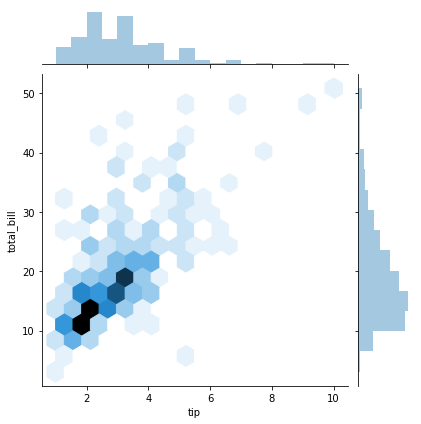

In [158]:
sns.jointplot(x='tip',y='total_bill',data=df,kind='hex')

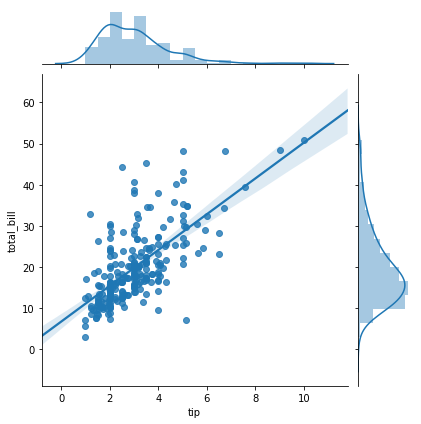

In [160]:
sns.jointplot(x='tip',y='total_bill',data=df,kind='reg')
# drawing an regression line using probablility density function

## Pair plot ( used to visualize when a dataset has more than 2 features, uses perm/combination of all the features)

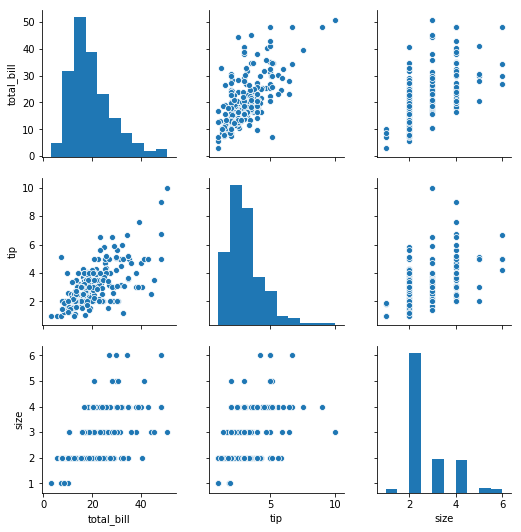

In [169]:
sns.pairplot(df)

In [166]:
df['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [165]:
df['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

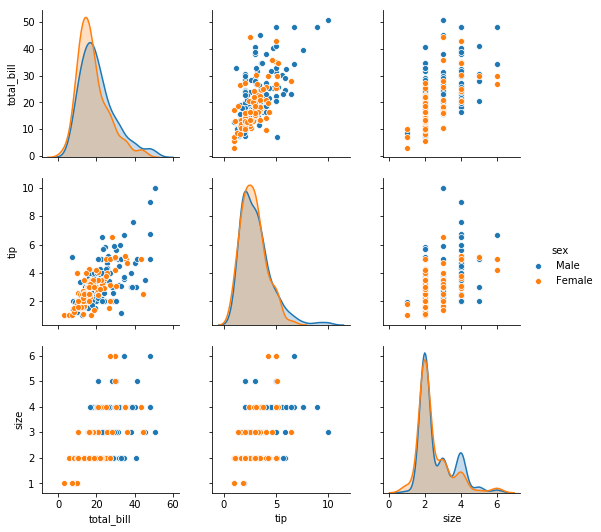

In [174]:
sns.pairplot(df,hue='sex') # based on one feature

### Distplot ( to check the distribution of column's features)

C:\Users\prathap\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


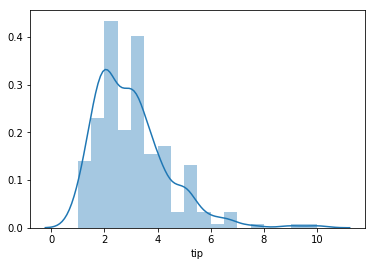

In [172]:
sns.distplot(df['tip'])

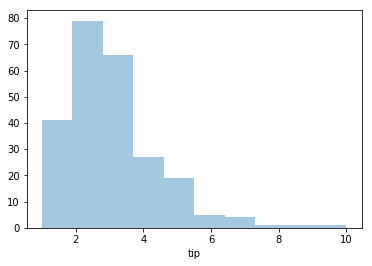

In [179]:
sns.distplot(df['tip'], kde=False, bins=10) # kernel density estimation= kde..

In [176]:
df['tip'].value_counts()

2.00    33
3.00    23
4.00    12
5.00    10
2.50    10
3.50     9
1.50     9
1.00     4
1.25     3
3.48     3
2.01     2
4.08     2
2.23     2
2.03     2
3.18     2
2.31     2
2.24     2
6.50     2
4.30     2
2.20     2
3.76     2
3.25     2
2.75     2
1.44     2
3.23     2
1.01     1
2.45     1
1.47     1
3.61     1
2.54     1
        ..
4.06     1
3.15     1
1.45     1
2.34     1
1.92     1
2.30     1
2.88     1
3.55     1
4.20     1
4.19     1
2.56     1
2.71     1
3.27     1
5.14     1
2.02     1
4.67     1
4.34     1
5.17     1
3.14     1
5.15     1
1.67     1
1.32     1
1.36     1
1.68     1
1.83     1
2.83     1
1.58     1
3.71     1
3.35     1
2.18     1
Name: tip, Length: 123, dtype: int64